# Lung Cancer Dataset - EDA
---

Luis Angel Garcia (2230177)  
Antonio Cardenas Jurado (2230433)  
Juliana Del Toro ()  


## Activate enviorment

## Libraries


In [22]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Mysql Config And Connection

In [23]:
config = {"host":"localhost","port":3306,"user": "root", "password":"","database":"lung_cancer"}

csv_file= './DATASET/lung_cancer_prediction_dataset.csv'

conn = mysql.connector.connect(host=config["host"],port=config["port"], user=config["user"], password=config["password"])
cursor= conn.cursor()

## Database And Table Create 

In [24]:
cursor.execute(f"CREATE DATABASE IF NOT EXISTS {config['database']}")
conn.database = config["database"]

## Dirt DATASET Load

In [25]:
cursor.execute(""" 
CREATE TABLE IF NOT EXISTS lung_cancer_dirty (
    id INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
    Country VARCHAR(255),
    Population_Size INT,
    Age INT,
    Gender VARCHAR(20),
    Smoker VARCHAR(20),
    Years_of_Smoking INT,
    Cigarettes_per_Day INT,
    Passive_Smoker VARCHAR(20),
    Family_History VARCHAR(20),
    Lung_Cancer_Diagnosis VARCHAR(20),
    Cancer_Stage VARCHAR(20),
    Survival_Years INT,
    Adenocarcinoma_Type VARCHAR(20),
    Air_Pollution_Exposure VARCHAR(20),
    Occupational_Exposure VARCHAR(20),
    Indoor_Pollution VARCHAR(20),
    Healthcare_Access VARCHAR(20),
    Early_Detection VARCHAR(20),
    Treatment_Type VARCHAR(20),
    Developed_or_Developing VARCHAR(20),
    Annual_Lung_Cancer_Deaths INT,
    Lung_Cancer_Prevalence_Rate FLOAT,
    Mortality_Rate FLOAT);
""")

conn.commit()
print ("La base de datos y tabla se ha creado con exito")

df = pd.read_csv(csv_file)
df = df.fillna("TEMP_NULL") 

cursor.execute("SELECT COUNT(*) FROM lung_cancer_dirty")
resultado = cursor.fetchone()
if resultado[0] == 0:
    for _, row in df.iterrows():
        cursor.execute("""
                   INSERT INTO lung_cancer_dirty (Country, Population_Size, Age,Gender, Smoker, Years_of_Smoking, Cigarettes_per_Day, Passive_Smoker, Family_History, Lung_Cancer_Diagnosis, Cancer_Stage, Survival_Years, Adenocarcinoma_Type, Air_Pollution_Exposure, Occupational_Exposure, Indoor_Pollution, Healthcare_Access, Early_Detection, Treatment_Type, Developed_or_Developing, Annual_Lung_Cancer_Deaths, Lung_Cancer_Prevalence_Rate, Mortality_Rate)
                   VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
                """, (row['Country'],row['Population_Size'],row['Age'],row['Gender'],row['Smoker'],row['Years_of_Smoking'],row['Cigarettes_per_Day'],row['Passive_Smoker'],row['Family_History'],row['Lung_Cancer_Diagnosis'],row['Cancer_Stage'],row['Survival_Years'],row['Adenocarcinoma_Type'],row['Air_Pollution_Exposure'],row['Occupational_Exposure'],row['Indoor_Pollution'],row['Healthcare_Access'],row['Early_Detection'],row['Treatment_Type'],row['Developed_or_Developing'],row['Annual_Lung_Cancer_Deaths'],row['Lung_Cancer_Prevalence_Rate'],row['Mortality_Rate']))
    conn.commit()
    print("Dato cargados correcctamente")
else:
    conn.commit()
    print("No es necesario volver a cargar los datos")

La base de datos y tabla se ha creado con exito
No es necesario volver a cargar los datos


Se cambio los nulos por "TEMP_NULL" para poder realizar la carga de los datos

## DATABASE Annalysis

## Analisamos las primeras filas

In [ ]:
print("\nPrimeras filas del dataset:")
print(df.head())

## Informacion general

In [ ]:
print("\nInformación del dataset:")
print(df.info())

## Valores Nulos

In [ ]:
nulos=(df == "TEMP_NULL").sum()
print(f'Los nulos de cada columna son:', nulos )

## Valores dupplicados

In [13]:
print("\nCantidad de filas duplicadas:", df.duplicated().sum())


Cantidad de filas duplicadas: 0


## Valores Unicos

In [ ]:
print("\nValores únicos en la columna 'Gender':", df['Gender'].unique())
print("Valores únicos en la columna 'Smoker':", df['Smoker'].unique())
print("Valores únicos en la columna 'Passive_Smoker':", df['Passive_Smoker'].unique())
print("Valores únicos en la columna 'Family_History':", df['Family_History'].unique())
print("Valores únicos en la columna 'Lung_Cancer_Diagnosis':", df['Lung_Cancer_Diagnosis'].unique())
print("Valores únicos en la columna 'Cancer_Stage':", df['Cancer_Stage'].unique())
print("Valores únicos en la columna 'Adenocarcinoma_Type':", df['Adenocarcinoma_Type'].unique())
print("Valores únicos en la columna 'Air_pollution_exposure':", df['Air_Pollution_Exposure'].unique())
print("Valores únicos en la columna 'Occupational_Exposure':", df['Occupational_Exposure'].unique())
print("Valores únicos en la columna 'Indoor_pollution':", df['Indoor_Pollution'].unique())
print("Valores únicos en la columna 'Healtcare_Access':", df['Healthcare_Access'].unique())
print("Valores únicos en la columna 'Early_Detection':", df['Early_Detection'].unique())
print("Valores únicos en la columna 'Developed_or_Developing':", df['Developed_or_Developing'].unique())

## Verificacion cigarrillos por dia

In [ ]:
min_cigarettes = df["Cigarettes_per_Day"].min()
max_cigarettes = df["Cigarettes_per_Day"].max()

print(f"\nLos minimos cigarrillos al dia encontrados fueron: ",min_cigarettes)
print(f"Los maximos cigarrillos al dia encontrados fueron: ",max_cigarettes)

smokers = (df["Cigarettes_per_Day"] > 0).sum()
print(f"\nNúmero de personas que fuman son fumadoras: {smokers}")

df_smokers = df[df["Cigarettes_per_Day"]>0]

q1 = df_smokers["Cigarettes_per_Day"].quantile(0.25)
q3 = df_smokers["Cigarettes_per_Day"].quantile(0.75)
iqr=q3-q1

limit_inf = max(1, q1- 1.5 * iqr)
limit_sup = q3 + 1.5 * iqr

atipic_value= df_smokers[(df_smokers["Cigarettes_per_Day"] < limit_inf) | (df_smokers["Cigarettes_per_Day"]>limit_sup)]

print(f"\nQ1: {q1}, Q3: {q3}, IQR: {iqr}")
print(f"Límite inferior ajustado: {limit_inf}")
print(f"Límite superior: {limit_sup}")
print(f"Número de valores atípicos: {atipic_value.shape[0]}")


Los valores Maximos de cigarrillos por dia pueden son un poco altos, se decidio conocer el limte superiore

## Verificacion de edad

In [16]:
age_max = df["Age"].max()
age_min = df["Age"].min()
print(f"\nLa edad maxima es: ", age_max)
print(f"La edad minima es: ", age_min)


La edad maxima es:  85
La edad minima es:  20


## Selecion de columnas

In [ ]:
query = "SELECT * FROM lung_cancer_dirty"

df = pd.read_sql(query, conn)

df_selected = df[["id","Age","Country","Lung_Cancer_Prevalence_Rate","Smoker","Years_of_Smoking","Cigarettes_per_Day","Passive_Smoker","Lung_Cancer_Diagnosis","Healthcare_Access","Early_Detection","Survival_Years","Developed_or_Developing","Mortality_Rate","Annual_Lung_Cancer_Deaths","Air_Pollution_Exposure","Occupational_Exposure","Indoor_Pollution","Family_History","Treatment_Type","Cancer_Stage"]]
print(df_selected.info())

## Limpieza de nulos

In [ ]:
nulos=(df_selected == "TEMP_NULL").sum()
print(f'Antes los nulos de cada columna son:', nulos )

df_selected.replace("TEMP_NULL", None, inplace=True)

nulos=(df_selected == "TEMP_NULL").sum()
print(f'Despues los nulos de cada columna son:', nulos )

## Convercion a boleanos

In [ ]:
df_selected["Early_Detection"] = df_selected["Early_Detection"].map({"Yes": True, "No": False})
print(df)

## Carga de dataset limpio a MySQL

In [ ]:
cursor.execute(""" 
CREATE TABLE IF NOT EXISTS lung_cancer_cleaned (
               "id",
               "Age",
               "Country",
               "Lung_Cancer_Prevalence_Rate",
               "Smoker","Years_of_Smoking",
               "Cigarettes_per_Day","Passive_Smoker",
               "Lung_Cancer_Diagnosis",
               "Healthcare_Access",
               "Early_Detection",
               "Survival_Years",
               "Developed_or_Developing",
               "Mortality_Rate",
               "Annual_Lung_Cancer_Deaths",
               "Air_Pollution_Exposure",
               "Occupational_Exposure",
               "Indoor_Pollution",
               "Family_History",
               "Treatment_Type",
               "Cancer_Stage");
""")

conn.commit()
print ("La Tabla de los datos limpios se creo con exito")

La Tabla de los datos limpios se creo con exito


## Vizualizaciones 

Casos positivos por pais

In [ ]:
diagnostics_by_country = df_selected[df_selected["Lung_Cancer_Diagnosis"] == "Yes"]["Country"].value_counts()

plt.figure(figsize=(12, 6))
diagnostics_by_country.plot(kind="bar", color="skyblue")
plt.xlabel("País")
plt.ylabel("Número de Diagnósticos")
plt.title("Distribución de casos de cáncer de pulmón por país")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Casos positivos segun si fuman o no

In [ ]:
smoking_diagnosis = df_selected.groupby("Smoker")["Lung_Cancer_Diagnosis"].value_counts().unstack()

plt.figure(figsize=(8, 5))
smoking_diagnosis.plot(kind="bar", stacked=True, color=["lightcoral", "lightgreen"])
plt.xlabel("Fumador")
plt.ylabel("Número de Personas")
plt.title("Relación entre tabaquismo y diagnóstico de cáncer de pulmón")
plt.legend(["No", "Sí"], title="Diagnóstico de Cáncer")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.show()


dispersión entre años de tabaquismo y diagnóstico

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Lung_Cancer_Diagnosis"], y=df_selected["Years_of_Smoking"], palette={"No": "lightgreen", "Yes": "lightcoral"})
plt.xlabel("Diagnóstico de Cáncer de Pulmón")
plt.ylabel("Años de Tabaquismo")
plt.title("Relación entre años de tabaquismo y diagnóstico de cáncer")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Revisar

In [ ]:
healthcare_detection = df_selected.groupby("Healthcare_Access")["Early_Detection"].value_counts().unstack()

healthcare_detection_norm = healthcare_detection.div(healthcare_detection.sum(axis=1), axis=0)

plt.figure(figsize=(8, 5))
healthcare_detection_norm.plot(kind="bar", stacked=True, color=["lightblue", "darkorange"], alpha=0.85)

plt.xlabel("Acceso a la Salud")
plt.ylabel("Proporción de Pacientes")
plt.title("Acceso a la salud y detección temprana del cáncer de pulmón")
plt.legend(["No Detectado Temprano", "Detectado Temprano"], title="Detección Temprana")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)

for i, (no_det, si_det) in enumerate(zip(healthcare_detection_norm[False], healthcare_detection_norm[True])):
    plt.text(i, no_det / 2, f"{no_det:.1%}", ha="center", fontsize=10, color="black", weight="bold")
    plt.text(i, no_det + si_det / 2, f"{si_det:.1%}", ha="center", fontsize=10, color="white", weight="bold")

plt.show()

## Tasa de mortalidad segun la etapa del cancer

In [ ]:
mortality_by_stage = df_selected.groupby("Cancer_Stage")["Mortality_Rate"].mean().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=mortality_by_stage.index, y=mortality_by_stage.values, palette="Reds_r")

plt.xlabel("Etapa del Cáncer")
plt.ylabel("Tasa Promedio de Mortalidad")
plt.title("Mortalidad según la etapa del cáncer")
plt.ylim(0, mortality_by_stage.max() * 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)


for i, value in enumerate(mortality_by_stage.values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha="center", fontsize=10, color="black")

## Diagnostico de cancer segun el nivel de contaminacion del aire

<Figure size 800x500 with 0 Axes>

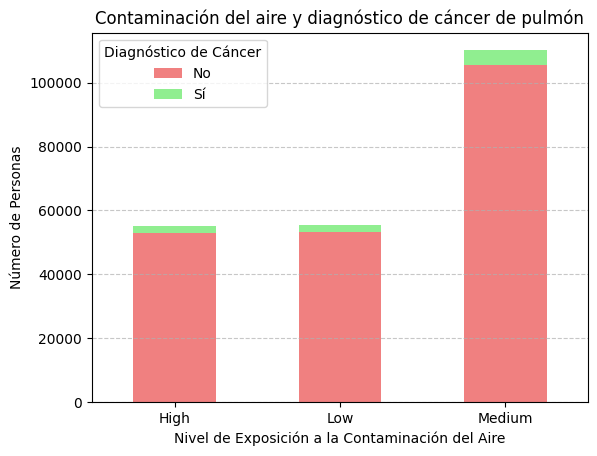

In [52]:
pollution_diagnosis = df_selected.groupby("Air_Pollution_Exposure")["Lung_Cancer_Diagnosis"].value_counts().unstack()

plt.figure(figsize=(8, 5))
pollution_diagnosis.plot(kind="bar", stacked=True, color=["lightcoral", "lightgreen"])
plt.xlabel("Nivel de Exposición a la Contaminación del Aire")
plt.ylabel("Número de Personas")
plt.title("Contaminación del aire y diagnóstico de cáncer de pulmón")
plt.legend(["No", "Sí"], title="Diagnóstico de Cáncer")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.show()


## Tasa de mortalidad entre paises desarrollados y en desarrollo

C:\Users\Luis Garcia\AppData\Local\Temp\ipykernel_20436\208216223.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mortality_by_dev_status.index, y=mortality_by_dev_status.values, palette=["blue", "orange"], alpha=0.85)


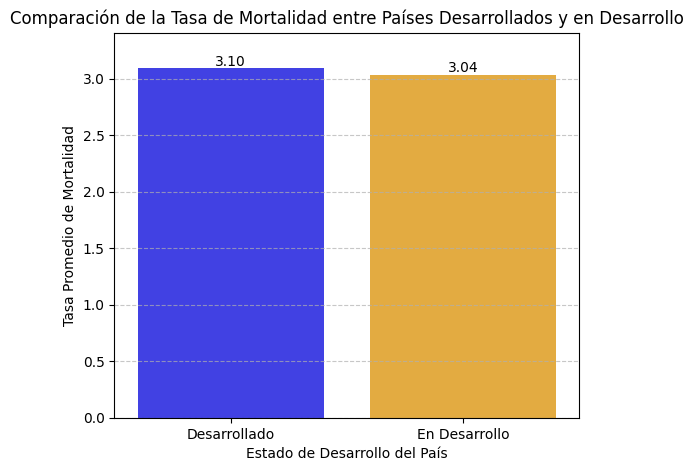

In [50]:
developed_countries = ["USA", "Canada", "Germany", "UK", "France", "Australia", "Japan"]
df["Development_Status"] = df["Country"].apply(lambda x: "Desarrollado" if x in developed_countries else "En Desarrollo")

mortality_by_dev_status = df.groupby("Development_Status")["Mortality_Rate"].mean()

plt.figure(figsize=(6, 5))
sns.barplot(x=mortality_by_dev_status.index, y=mortality_by_dev_status.values, palette=["blue", "orange"], alpha=0.85)

plt.xlabel("Estado de Desarrollo del País")
plt.ylabel("Tasa Promedio de Mortalidad")
plt.title("Comparación de la Tasa de Mortalidad entre Países Desarrollados y en Desarrollo")
plt.ylim(0, mortality_by_dev_status.max() * 1.1) 
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)

for i, value in enumerate(mortality_by_dev_status.values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha="center", fontsize=10, color="black")

plt.show()

## Cerramos conexion

In [17]:
cursor.close()
conn.close()